In [1]:
#read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

#create x (features) and y (response)
X = iris.data
y = iris.target

In [2]:
#impòrt the class
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# impòrt matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

## [Comparing machine learning models in scikit-learn](https://www.youtube.com/watch?v=0pP4EwWJgIU)

In [3]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X,y)

# predict the response values for the observations in x
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### LogisticRegression

In [4]:
# store the predicted response values

y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

In [5]:
#compute classificattion accurancy for the logistic regression model
print(metrics.accuracy_score(y,y_pred))

0.96


### KNN(K=5)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


### KNN(K=1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


# #2: Train/test split

In [8]:
#print the shape of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=4)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


### Repeat LogisticRegression

In [11]:
# STEP 2: train model on the training set
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


### Repeat KNN(K=5)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


### Repeat KNN(K=1)

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


## Can we locate an even better value for K?

In [15]:
k_range = range(1,26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

Text(0,0.5,'Testing Accuracy')

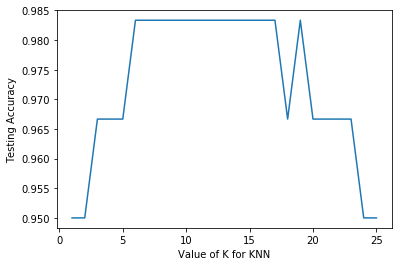

In [16]:
#plot the relationship between k and testing accuracy
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

# [Selecting the best model in scikit-learn using cross-validation](https://www.youtube.com/watch?v=6dbrR-WymjI)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2) #4
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [18]:
from sklearn.cross_validation import KFold
kf = KFold(25,5)

#print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration','Training set observations','Testing set observations'))
for iteration, data in enumerate(kf,start=1):
    print('{:^9} {} {!s:^25s}'.format(iteration, data[0], data[1]))
print('')    
print('This only show how will be selecting the observations')

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     

This only show how will be selecting the observations


C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Cross-validation recommendations

1. K can be any number, but K = 10 is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    * Each response class should be represented with equal proportions in each of the K folds
    * scikit-learn's cross_val_score function does this by default

## Cross-validation example: parameter tuning

Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
print(scores)
print('')
print('Mean:',scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]

Mean: 0.9666666666666668


In [20]:
# search for an optimal value of k for KNN
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

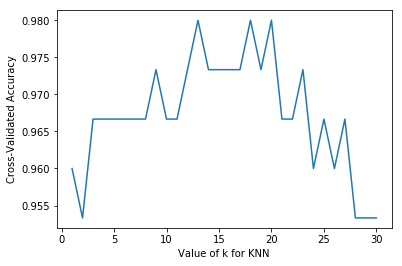

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Cross-validation example: model selection

**Goal:** Compare the best KNN model with logistic regression on the iris dataset

In [22]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9800000000000001


In [23]:
# 10-fold cross-validation with Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


## Cross-validation example: featur selection

**Goal:** Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [24]:
import pandas as pd
import numpy as np

In [25]:
# read in the advertising dataset
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
feature_cols = ['TV','radio','newspaper']

Xs = df[feature_cols]

ys = df.sales

# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, Xs, ys, cv=10, scoring='neg_mean_squared_error')
print (scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [27]:
#fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [28]:
#convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
rmse_scores.mean()

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


1.6913531708051792

In [29]:
# 10-fold cross-validation excluding Newspaper
feature_cols = ['TV','radio']
Xs = df[feature_cols]

np.sqrt(-cross_val_score(lm, Xs, ys, cv=10, scoring='neg_mean_squared_error')).mean()

1.6796748419090766

## Improvements to cross-validation

#### Repeated cross-validation
* Repeat cross-validation multiple times (with different random splits of the data) and average the results
* More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation

#### Creating a hold-out set
* "Hold out" a portion of the data before beginning the model building process
* Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
* More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

####  Feature engineering and selection within cross-validation iterations
* Normally, feature engineering and selection occurs before cross-validation
* Instead, perform all feature engineering and selection within each cross-validation iteration
* More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data


https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

# [How to find the best model parameters in scikit-learn](https://www.youtube.com/watch?v=Gol_qOgRqfA&index=8&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)

## More effcent parameter tuning using GridSearchCV

Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# define the parameter values that should be searched
k_range = range(1,31)

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)

print(param_grid)

{'n_neighbors': range(1, 31)}


In [32]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy',return_train_score=True)

* You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)

In [33]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [34]:
# fit the grid with data
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [35]:
# view the complete results (list of named tuples)
grid.grid_scores_  
#grid.cv_results_

C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [36]:
grid.cv_results_['mean_test_score']

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

In [37]:
grid.cv_results_['std_test_score']

array([0.05333333, 0.05206833, 0.04472136, 0.04472136, 0.04472136,
       0.04472136, 0.04472136, 0.04472136, 0.03265986, 0.04472136,
       0.04472136, 0.03265986, 0.0305505 , 0.04422166, 0.03265986,
       0.03265986, 0.03265986, 0.0305505 , 0.03265986, 0.0305505 ,
       0.03333333, 0.03333333, 0.03265986, 0.04422166, 0.03333333,
       0.04422166, 0.04472136, 0.04268749, 0.04268749, 0.04268749])

In [38]:
print(grid.cv_results_['params'][0])
print(grid.cv_results_['split0_test_score'][0])
print(grid.cv_results_['split1_test_score'][0])
grid.cv_results_['mean_test_score'][0]

{'n_neighbors': 1}
1.0
0.9333333333333333


0.96

In [39]:
grid.grid_scores_[0].cv_validation_scores

C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

Text(0,0.5,'Cross-Validated Accuracy')

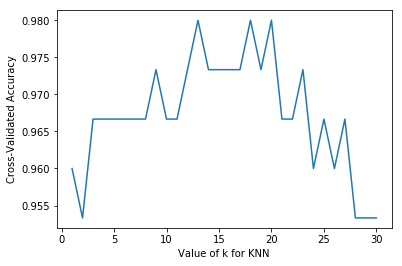

In [40]:
k_range = range(1,31)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,grid.cv_results_['mean_test_score'])
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [41]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


## Searching multiple parameters simultaneously

In [42]:
# define the parameter values that should be searched
k_range = range(1,31)
weight_options = ['uniform','distance']

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range, weights=weight_options)

print(param_grid)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


In [43]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
# view the complete 
grid.grid_scores_

C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [45]:
grid.cv_results_['mean_test_score']

array([0.96      , 0.96      , 0.95333333, 0.96      , 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.97333333, 0.97333333, 0.96666667, 0.97333333,
       0.96666667, 0.97333333, 0.97333333, 0.97333333, 0.98      ,
       0.97333333, 0.97333333, 0.97333333, 0.97333333, 0.98      ,
       0.97333333, 0.97333333, 0.97333333, 0.98      , 0.98      ,
       0.97333333, 0.97333333, 0.98      , 0.98      , 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.97333333,
       0.97333333, 0.96      , 0.97333333, 0.96666667, 0.97333333,
       0.96      , 0.96666667, 0.96666667, 0.98      , 0.95333333,
       0.97333333, 0.95333333, 0.97333333, 0.95333333, 0.96666667])

In [46]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameters to make predictions

In [47]:
import numpy as np
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X,y)

# make a prediction on out-of-sample data
knn.predict(np.array([3,5,4,2]).reshape((1, -1)))

array([1])

In [48]:
# shortcut : GridSearchCV automatically refits the best model using all of the data
grid.predict(np.array([3,5,4,2]).reshape((1, -1)))

array([1])

## Reducing computational expense using RandomizedSearchCV
* Searching many different parameters at once may be computationally infeasible
* RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors = k_range, weights=weight_options)

* **Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [51]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn,param_dist,cv=10, scoring = 'accuracy', n_iter=10, random_state=5)
rand.fit(X,y)
rand.grid_scores_

C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [52]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}
